# Bike Sharing Assignment
#### Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

#### Business Goal
Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [3932]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3933]:
# Importing the dataset
bike_data = pd.read_csv('day.csv')

In [3934]:
bike_data.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
720,721,22-12-2019,1,1,12,0,0,0,1,10.899153,11.80565,44.1250,27.292182,205,1544,1749
721,722,23-12-2019,1,1,12,0,1,1,1,10.079153,12.97355,51.5417,8.916561,408,1379,1787
722,723,24-12-2019,1,1,12,0,2,1,2,9.483464,12.94500,79.1304,5.174437,174,746,920
723,724,25-12-2019,1,1,12,1,3,0,2,11.943464,14.72325,73.4783,11.304642,440,573,1013
724,725,26-12-2019,1,1,12,0,4,1,3,9.976653,11.01665,82.3333,21.208582,9,432,441
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [3935]:
bike_data.head(15)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [3936]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Weather and Season are captured as Categorical Variables with Numbers. These Numbers doesnt have any significance. Hence covert it to actual String value, then create dummy variable later

In [3937]:
# get actual value for season and weather.

bike_data['season'] = bike_data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike_data['weathersit'] = bike_data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light rain', 4: 'heavy rain'})

In [3938]:
#all data is present and no missing values
# convert date to datetime
#bike_data['dteday'] = pd.to_datetime(bike_data['dteday'])
bike_data.loc[10:15]['dteday']

10    11-01-2018
11    12-01-2018
12    13-01-2018
13    14-01-2018
14    15-01-2018
15    16-01-2018
Name: dteday, dtype: object

In [3939]:
#Create a function to read a string seperated by / and return the data in format of mm/dd/yyyy. The input data would be informat dd/m/yyyy or dd-mm-yyyy

def convert_date(date):
    if '-' in date:
        date = date.replace('-', '/')
    d = date.split('/')
    dd= d[0]
    append_month= lambda x: x if len(x) == 2 else '0'+x
    mm = append_month(d[1])
    yyyy = d[2]
    return mm+'/'+dd+'/'+yyyy


In [3940]:
bike_data['extracted_date'] = bike_data['dteday'].apply(convert_date)
bike_data['day_of_the_week'] = pd.to_datetime(bike_data['extracted_date']).dt.day_name()

In [3941]:
#enumerate weekday, create a map with Tuesday starting from 0

day_map = {'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':0, 'Monday':1}
bike_data['weekday'] = bike_data['day_of_the_week'].map(day_map)


In [3942]:
bike_data.weekday.value_counts()

weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64

In [3943]:
# Monday & Tuesday's are holidays update holiday column
bike_data['workingday'] = bike_data['weekday'].apply(lambda x: 0 if x in [6,0] else 1)

In [3944]:
# update workingday by checking if the day is a holiday or not if Holiday is 1 then working day is 0 else 1
bike_data.loc[bike_data['holiday'] == 1, 'workingday'] = 0

In [3945]:
bike_data[['day_of_the_week', 'weekday']].value_counts()

day_of_the_week  weekday
Monday           1          105
Tuesday          2          105
Friday           5          104
Saturday         6          104
Sunday           0          104
Thursday         4          104
Wednesday        3          104
Name: count, dtype: int64

In [3946]:
bike_data = bike_data.drop(['dteday', 'extracted_date', 'day_of_the_week'], axis=1)

In [3947]:
#round of temp, atemp, hum, windspeed to 2 decimal places

bike_data[['temp', 'atemp', 'hum', 'windspeed']] = bike_data[['temp', 'atemp', 'hum', 'windspeed']].round(2)

In [3948]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
category_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

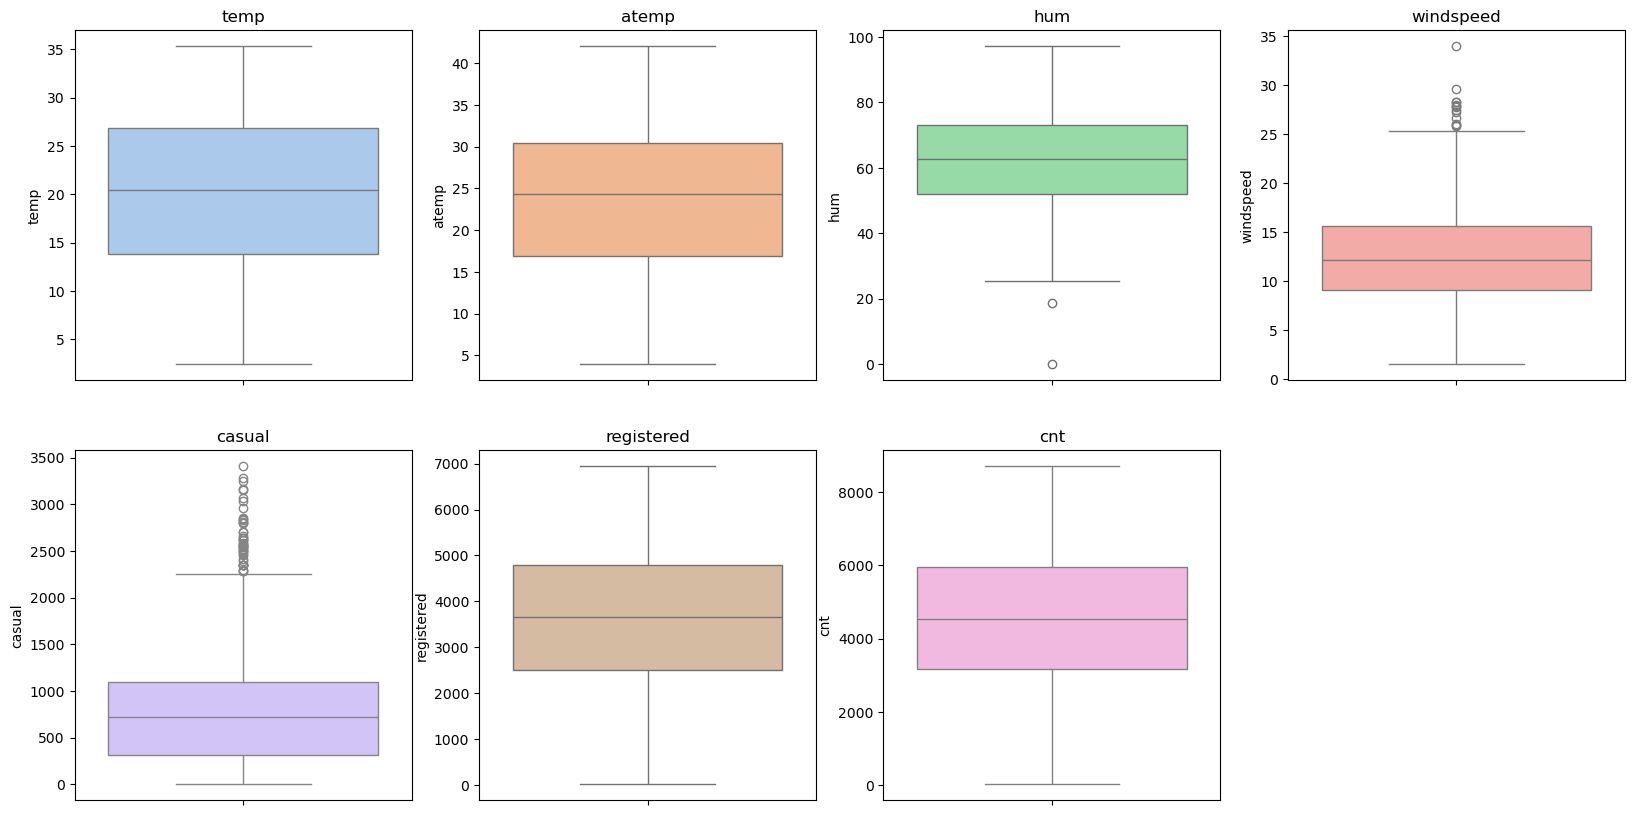

In [3949]:
#boxplot for numeric columns

color = sns.color_palette('pastel')

plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(bike_data[col], color=color[i])
    plt.title(col)

##### Not much outliers to address them

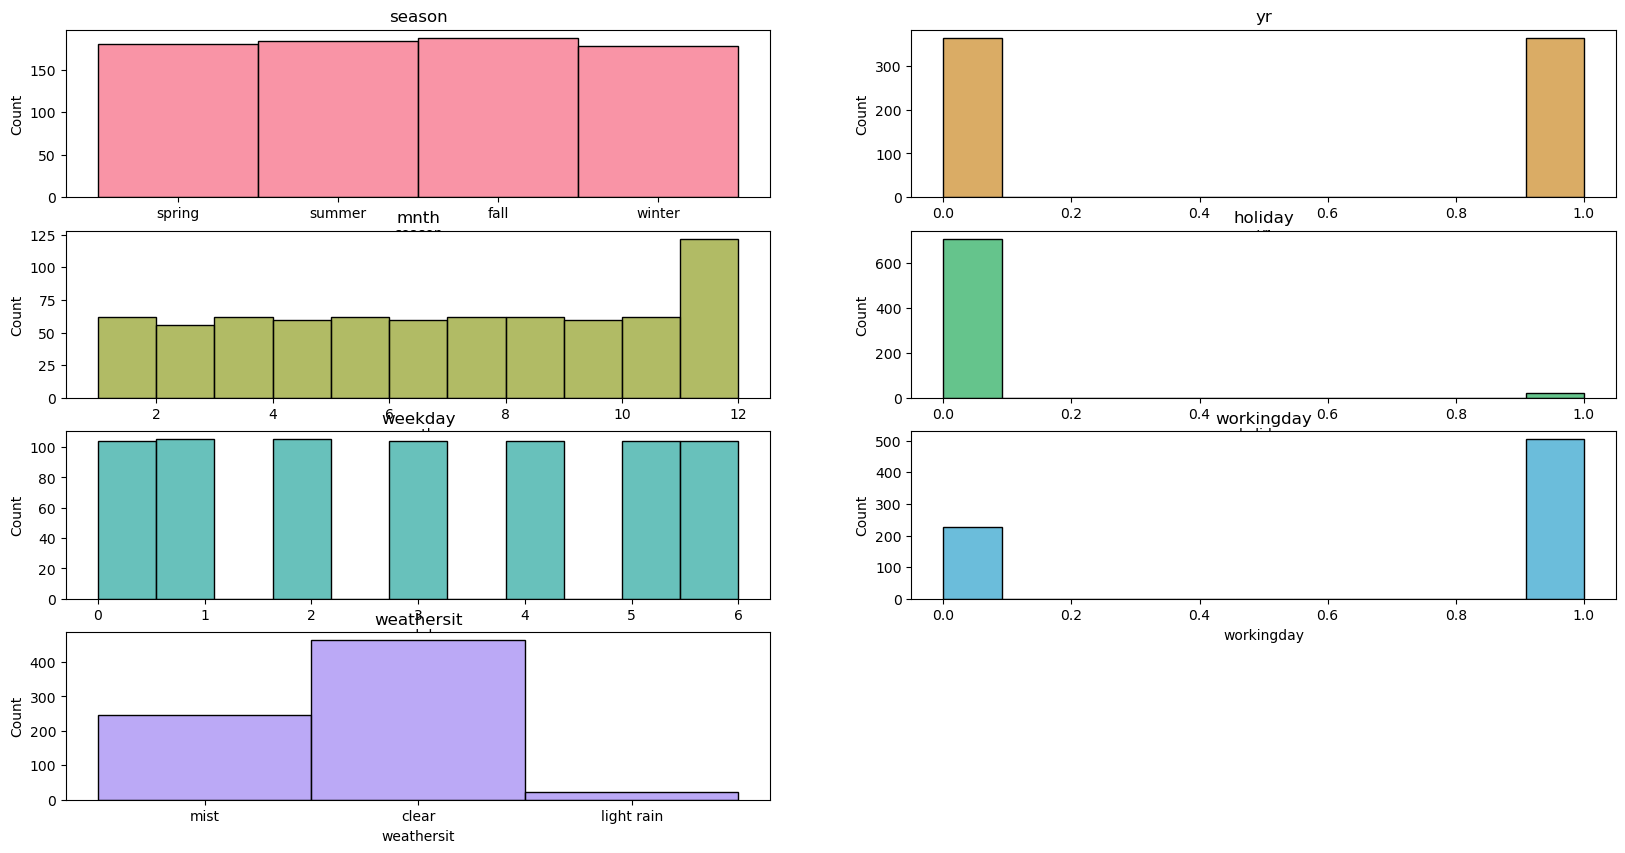

In [3950]:
#histogram for categorical columns
color = sns.color_palette('husl', 8)

plt.figure(figsize=(20, 10))
for i, col in enumerate(category_cols):
    plt.subplot(4, 2, i+1)
    sns.histplot(bike_data[col], color=color[i])
    plt.title(col)

# BiVariate Analysis.
##### Analyze the relationship between the target variable and the independent variables
##### target variable is cnt and independent variables are temp, atemp, hum, windspeed, casual, registered, weekday, workingday, weathersit, yr, mnth, holiday, season


<Figure size 2000x2000 with 0 Axes>

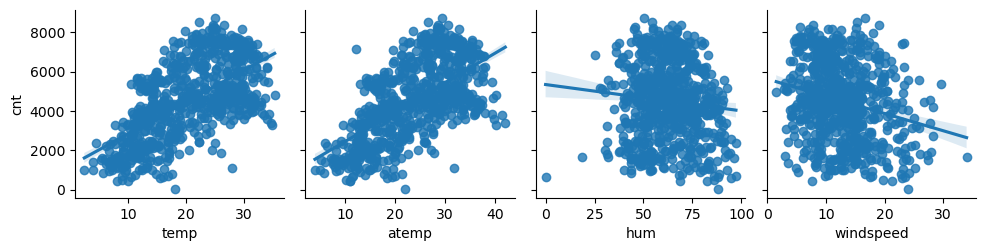

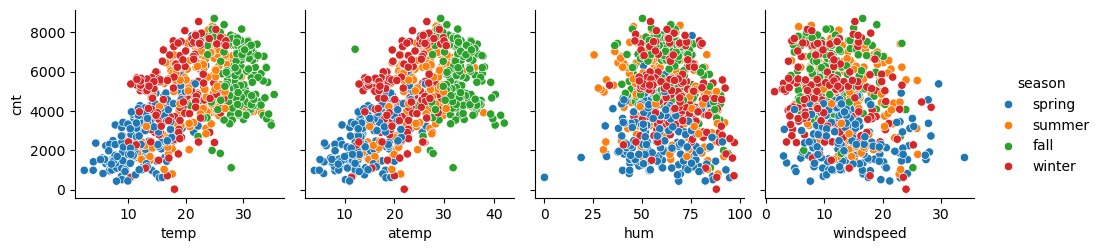

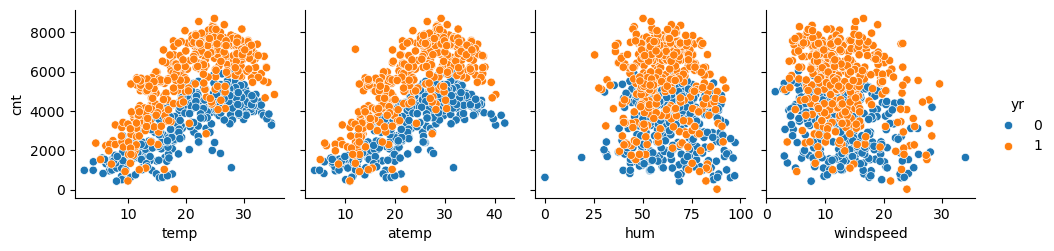

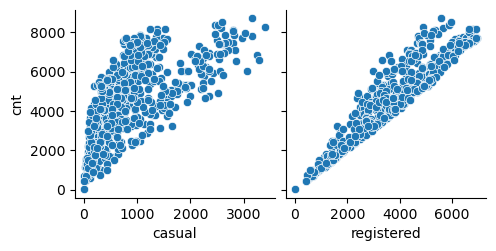

In [3951]:
# plot cnt vs all numeric columns in scatter plot to see the relationship. use pairplot

# use different colors for different charts



plt.figure(figsize=(20, 20))

sns.pairplot(bike_data, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'],kind='reg')
sns.pairplot(bike_data, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'], kind='scatter', diag_kind=None, hue='season')

sns.pairplot(bike_data, x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'], kind='scatter', diag_kind=None, hue='yr')
sns.pairplot(bike_data, x_vars=['casual', 'registered'], y_vars=['cnt'])

plt.show()


#season : season (1:spring, 2:summer, 3:fall, 4:winter)




In [3952]:
bike_data.columns

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [3953]:
#Convert Weekday to categorical variable of binary type

bike_data['weekday'] = bike_data['weekday'].apply(lambda x: 0 if x in [6,0] else 1)

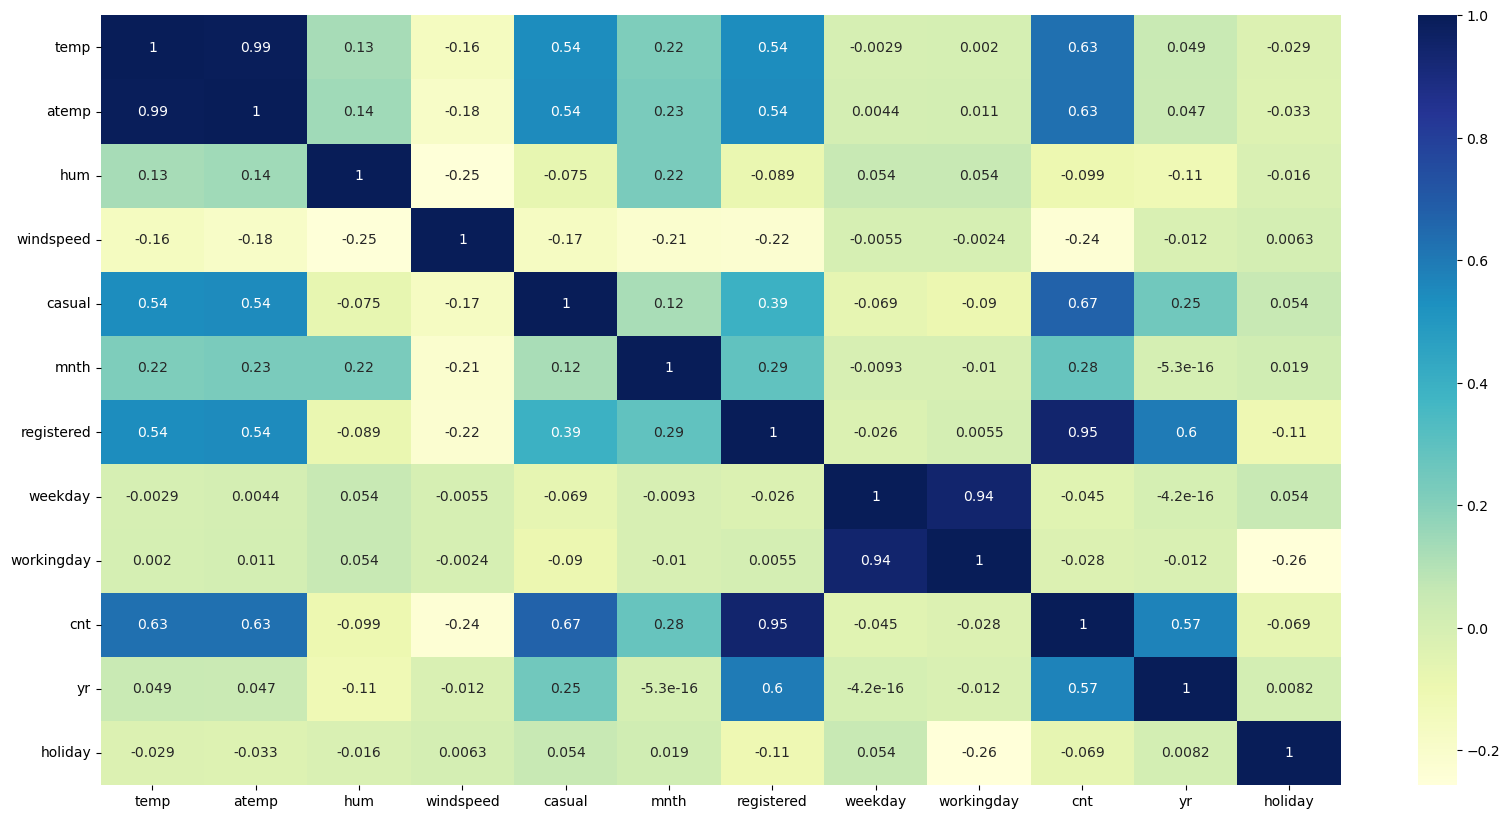

In [3954]:
#Heatmap to see the correlation between the variables

# create heatmap excluding weathersit and season

plt.figure(figsize=(20, 10))
sns.heatmap(bike_data[['temp', 'atemp', 'hum', 'windspeed', 'casual','mnth', 'registered', 'weekday','workingday','cnt','yr','holiday']].corr(), annot=True, cmap="YlGnBu")
plt.show()

##### Drop the variables that are of least importance

In [3955]:
# Drop the variables that are of least importance
bike_data = bike_data.drop('instant', axis=1)

#atemp and temp are highly correlated, drop atemp
bike_data = bike_data.drop('atemp', axis=1)

#season and mnth are highly correlated. drop mnth
bike_data = bike_data.drop('mnth', axis=1)

# Registerd and casual are highly correlated with cnt. drop them. They are also target leakers. + Registered  + Casual = cnt
bike_data = bike_data.drop(['registered', 'casual'], axis=1)

#weekday and workingday are highly correlated. drop weekday
bike_data = bike_data.drop('weekday', axis=1)

In [3956]:
# Preprocessing the data

#create dummies for season, weekday, weathersit, holiday, workingday

season_dummies = pd.get_dummies(bike_data['season'], prefix='season', dtype=int)
#yr_dummies = pd.get_dummies(bike_data['yr'], prefix='yr', drop_first=True,dtype=int)
weathersit_dummies = pd.get_dummies(bike_data['weathersit'], prefix='weathersit',dtype=int)
#holiday_dummies = pd.get_dummies(bike_data['holiday'], prefix='holiday', drop_first=True,dtype=int)

In [3957]:
#concatenate the dummies to the original dataframe
bike_data = pd.concat([bike_data, season_dummies, weathersit_dummies], axis=1)

In [3958]:
bike_data.head()

,season,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,season_fall,season_spring,season_summer,season_winter,weathersit_clear,weathersit_light rain,weathersit_mist
0,spring,0,0,1,mist,14.11,80.58,10.75,985,0,1,0,0,0,0,1
1,spring,0,0,1,mist,14.90,69.61,16.65,801,0,1,0,0,0,0,1
2,spring,0,0,1,clear,8.05,43.73,16.64,1349,0,1,0,0,1,0,0
3,spring,0,0,1,clear,8.20,59.04,10.74,1562,0,1,0,0,1,0,0
4,spring,0,0,1,clear,9.31,43.70,12.52,1600,0,1,0,0,1,0,0


In [3959]:
#drop season, weekday, yr, weathersit, holiday as we have created dummies for them
bike_data = bike_data.drop(['season',  'weathersit'], axis=1)

In [3960]:
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_clear', 'weathersit_light rain', 'weathersit_mist'],
      dtype='object')

In [3961]:
bike_data.shape

(730, 14)

##### Create the Training and Test set data
Use train_test_split from sklearn

In [3962]:
#Train Test Split

X = bike_data.drop('cnt', axis=1)
y = bike_data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)



In [3963]:
#Make a copy of the data to use for min max scaling

X_train_min_max = X_train.copy()
X_test_min_max = X_test.copy()


In [3964]:
X_train.shape, X_test.shape,  y_train.shape,  y_test.shape, X_train_min_max.shape, X_test_min_max.shape

((511, 13), (219, 13), (511,), (219,), (511, 13), (219, 13))

# Scaling of the Data. 
### Both approaches, Standardization and MinMax Scaling are presented in this notebook. 
- Standard Scaler

In [3965]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_clear', 'weathersit_light rain', 'weathersit_mist'],
      dtype='object')

In [3966]:
len(X_train.columns)

13

In [3967]:
numeric_cols = ['temp', 'hum', 'windspeed']
category_cols = ['yr', 'holiday', 'workingday', 'season_fall', 'season_spring', 'season_summer', 'season_winter', 'weathersit_clear', 'weathersit_light rain', 'weathersit_mist']

In [3968]:
# Need to scale the data, Use StandardScaler. This method is standardizing the features by removing the mean and scaling to unit variance
#formula is z = (x - u) / s where u is the mean of the training samples and s is the standard deviation of the training samples

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [3969]:
X_train_scaled.head()

,yr,holiday,workingday,temp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,weathersit_clear,weathersit_light rain,weathersit_mist
653,1,0,1,-0.122228,-0.515193,-0.118099,0,0,0,1,1,0,0
576,1,0,1,1.232749,0.517424,-0.332048,1,0,0,0,1,0,0
426,1,0,0,-0.421536,-0.070014,-0.386956,0,1,0,0,0,0,1
728,1,0,1,-1.296541,-1.046011,2.019497,0,1,0,0,1,0,0
482,1,0,0,-0.629164,-1.001422,-0.780773,0,0,1,0,0,0,1


In [3970]:
# Ouput of the scaler is an numpy array, we need to convert it to a dataframe and use the same columns from X
#X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train[numeric_cols].columns)
#X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test[numeric_cols].columns)

In [3971]:
#Scale Y values. Scaling Y value is important as X values are scaled. If Y values are not scaled then the model will be biased towards the Y values.


y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

y_train_ss =y_train.copy()
y_test_ss = y_test.copy()

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train_ss)
y_test_scaled = y_scaler.transform(y_test_ss)

y_train_ss = y_train_scaled.flatten()
y_test_ss = y_test_scaled.flatten()

In [3972]:
y_train.shape, y_test.shape

((511, 1), (219, 1))

### Min Max Scaling

In [3973]:
X_train_min_max_scaled = X_train_min_max[numeric_cols]  
X_test_min_max_scaled = X_test_min_max[numeric_cols]

In [3974]:
# Min Max Scaling. Forumula = X-min(X) / max(X) - min(X)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_min_max_scaled = scaler.fit_transform(X_train_min_max_scaled)
X_test_min_max_scaled  = scaler.transform(X_test_min_max_scaled)



# Ouput of the scaler is an numpy array, we need to convert it to a dataframe and use the same columns from X

X_train_min_max_scaled = pd.DataFrame(X_train_min_max_scaled, columns=numeric_cols, index=X_train_min_max.index)
X_test_min_max_scaled = pd.DataFrame(X_test_min_max_scaled, columns=numeric_cols, index=X_test_min_max.index)





In [3975]:
X_train_min_max_scaled.head()

,temp,hum,windspeed
653,0.509875,0.575330,0.300930
576,0.815254,0.725680,0.264678
426,0.442419,0.640148,0.255374
728,0.245214,0.498042,0.663138
482,0.395624,0.504534,0.188643


In [3976]:
X_train_min_max.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_fall', 'season_spring', 'season_summer', 'season_winter',
       'weathersit_clear', 'weathersit_light rain', 'weathersit_mist'],
      dtype='object')

In [3977]:
#combine the scaled numeric columns with the categorical columns without interchaning the index

# drop numeric columns from X_train_min_max and X_test_min_max

X_train_min_max = X_train_min_max.drop(numeric_cols, axis=1)
X_test_min_max = X_test_min_max.drop(numeric_cols, axis=1)
X_train_min_max.shape, X_test_min_max.shape


((511, 10), (219, 10))

In [3978]:
X_train_min_max = pd.concat([X_train_min_max, X_train_min_max_scaled], axis=1)
X_test_min_max = pd.concat([X_test_min_max, X_test_min_max_scaled], axis=1)

In [3979]:
X_train_min_max.head()

,yr,holiday,workingday,season_fall,season_spring,season_summer,season_winter,weathersit_clear,weathersit_light rain,weathersit_mist,temp,hum,windspeed
653,1,0,1,0,0,0,1,1,0,0,0.509875,0.575330,0.300930
576,1,0,1,1,0,0,0,1,0,0,0.815254,0.725680,0.264678
426,1,0,0,0,1,0,0,0,0,1,0.442419,0.640148,0.255374
728,1,0,1,0,1,0,0,1,0,0,0.245214,0.498042,0.663138
482,1,0,0,0,0,1,0,0,0,1,0.395624,0.504534,0.188643


In [3980]:
# Create a copy for Manual Feature Selection

X_train_min_max_scaled_manual = X_train_min_max.copy()
X_test_min_max_scaled_manual = X_test_min_max.copy()


In [3981]:
# Scale Y values

y_train_mm = y_train.reshape(-1,1)

y_test_mm = y_test.reshape(-1,1)    

y_scaler = MinMaxScaler()
y_train_mm = y_scaler.fit_transform(y_train_mm)
y_test_mm = y_scaler.transform(y_test_mm)


In [3982]:
# Build VIF Function

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['feature'] = data.columns
    vif_data['VIF'] = [round(variance_inflation_factor(data.values, i),3) for i in range(data.shape[1])]
    vif_data = vif_data.sort_values(by='VIF', ascending=False)
    return vif_data


# Feature Selection 
##### Both RFE and Manual Selection features are presented in this notebook.

- Recursive Feature Elimination

In [3983]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE # Recursive Feature Elimination

- Create Linear Regression Model
- Then use RFE to select the best features
- Train the model with the selected features
- Evaluate the model with the test data
- Compare the results with the model trained with all features



##### Using Standardization and Statsmodel and Sklearn Model

- X_train : Scaled data with Standard Scaler
- X_train_min_max_scaled : Scaled data with Min Max Scaler
- X_test : Scaled test data with Standard Scaler
- X_test_min_max_scaled : Scaled test data with Min Max Scaler
- X_train_min_max_scaled_manual : Scaled data with Min Max Scaler for manual feature selection
- X_test_min_max_scaled_manual : Scaled test data with Min Max Scaler for manual feature selection
- y_train_ss : Scaled values for y_train using standard scaler
- y_test_ss : scaled values of y_test using standard scaler
- y_train_mm : scaled values of y_train using min max
- y_test_mm:scaled values of y_test using min max

In [3984]:
# Create a linear regression model for feature selection
lr = LinearRegression()

# Create the RFE model and select 10 attributes  

rfe =  RFE(lr, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)



In [3985]:
# Print the features selected by RFE 

print('Selected features: %s' % list(X_train_scaled.columns[rfe.support_]))


Selected features: ['yr', 'holiday', 'workingday', 'temp', 'season_spring', 'season_summer', 'season_winter', 'weathersit_clear', 'weathersit_light rain', 'weathersit_mist']


In [3986]:
#Train the model using the selected features
# add a constant to the model

#as RFE would select automatically, here in this case we are selecting the features manually that was initially selected by RFE

#selected_features = list(X_train.columns[rfe.support_])
selected_features =['yr', 'holiday', 'workingday', 'temp', 'season_spring', 'season_summer', 'season_winter', 'weathersit_clear', 'weathersit_light rain', 'weathersit_mist']

X_train_scaled=X_train_scaled[X.columns[rfe.support_]]
X_test_scaled = X_test_scaled[X.columns[rfe.support_]]

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)


In [3987]:
# Build stats model using Ordinary Least Squares method for the features selected by RFE.
stats_model = sm.OLS(y_train_ss, X_train_scaled).fit()

In [3988]:
print(stats_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.51e-175
Time:                        15:36:53   Log-Likelihood:                -298.52
No. Observations:                 511   AIC:                             617.0
Df Residuals:                     501   BIC:                             659.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.64

In [3989]:
#weather mist is insignificant, drop it

#X_train_scaled = X_train_scaled.drop('holiday', axis=1)
#X_test_scaled = X_test_scaled.drop('holiday', axis=1)

X_train_scaled = X_train_scaled.drop('weathersit_mist', axis=1)
X_test_scaled = X_test_scaled.drop('weathersit_mist', axis=1)

stats_model1a = sm.OLS(y_train_ss, X_train_scaled).fit()
print(stats_model1a.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.51e-175
Time:                        15:36:53   Log-Likelihood:                -298.52
No. Observations:                 511   AIC:                             617.0
Df Residuals:                     501   BIC:                             659.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.64

In [3990]:
#season summer is > 0.05, remove it and rebuild the model

X_train_scaled = X_train_scaled.drop('season_summer', axis=1)
X_test_scaled = X_test_scaled.drop('season_summer', axis=1)

stats_model1b = sm.OLS(y_train_ss, X_train_scaled).fit()
print(stats_model1b.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     267.9
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          9.79e-176
Time:                        15:36:53   Log-Likelihood:                -300.45
No. Observations:                 511   AIC:                             618.9
Df Residuals:                     502   BIC:                             657.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.56

In [3991]:
# Check VIF
print(calculate_vif(X_train_scaled))

                 feature    VIF
0                  const  8.249
5          season_spring  2.514
4                   temp  2.413
6          season_winter  1.686
2                holiday  1.085
3             workingday  1.080
7       weathersit_clear  1.079
8  weathersit_light rain  1.069
1                     yr  1.017


#### With RFE, Automatically selected fields, Model R2 has been 81% and with no predictor having VIF more than 2. All P values are less than 0.05 which means all the selected B coeff are significant.

In [3992]:
#mse for Training data

y_train_pred = stats_model1b.predict(X_train_scaled)
mse_train = mean_squared_error(y_train_ss, y_train_pred)
print('MSE for training data:', round(mse_train,3))

MSE for training data: 0.19


#### Run the model against Test Data. Model1b

In [3993]:
# Run the model on test data and compare the R2 and MSE on stats model2

y_pred = stats_model1b.predict(X_test_scaled)

r2 = r2_score(y_test_ss, y_pred)
mse = mean_squared_error(y_test_ss, y_pred)

print('R2 is {} & MSE is {}'.format(round(r2,3), round(mse,3)))

R2 is 0.81 & MSE is 0.179


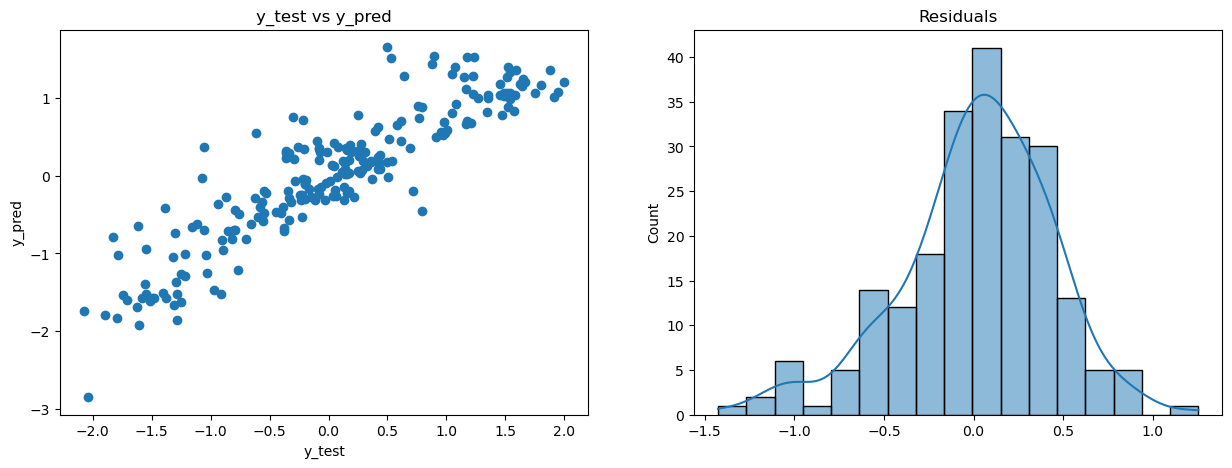

In [3994]:
# plot y_test vs y_pred & residuals as histogram

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_ss, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')

plt.subplot(1, 2, 2)
sns.histplot(y_test_ss - y_pred, kde=True)
plt.title('Residuals')
plt.show()

In [4043]:
X_train_scaled.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'season_spring',
       'season_winter', 'weathersit_clear', 'weathersit_light rain'],
      dtype='object')

#### With this Model1b, it explains variance of 81% and MSE of 0.179. Residuals are normal distribution around mean 0

##### StatsModel was used earlier. Now trying with sklearn model libray

In [3995]:
# Build model with sklearn

lm = LinearRegression()
lm.fit(X_train_scaled, y_train_ss)


LinearRegression()

In [3996]:
lm.intercept_, lm.coef_

(-0.5622540415776387,
 array([ 0.        ,  1.04344635, -0.47604595, -0.09349751,  0.4441723 ,
        -0.539434  ,  0.24616018,  0.3333572 , -0.98729189]))

Similar Constant & Co-efficients

In [3997]:
# print lm cofficients side by side with stats model

B =pd.DataFrame({'stats_model': stats_model1b.params, 'sklearn_model': lm.coef_})


In [3998]:
B

,stats_model,sklearn_model
const,-0.562254,0.000000
yr,1.043446,1.043446
holiday,-0.476046,-0.476046
workingday,-0.093498,-0.093498
temp,0.444172,0.444172
season_spring,-0.539434,-0.539434
season_winter,0.246160,0.246160
weathersit_clear,0.333357,0.333357
weathersit_light rain,-0.987292,-0.987292


In [3999]:
# Predict on test data with sklearn model

In [4000]:
y_pred = lm.predict(X_test_scaled)

In [4001]:
# Calculate R2 and MSE

r2 = r2_score(y_test_ss, y_pred)
mse = mean_squared_error(y_test_ss, y_pred)
print('R2 is {} & MSE is {}'.format(round(r2,3), round(mse,3)))

R2 is 0.81 & MSE is 0.179


### R2 is 81% and MSE is 0.179. This model explains 74% of the varience

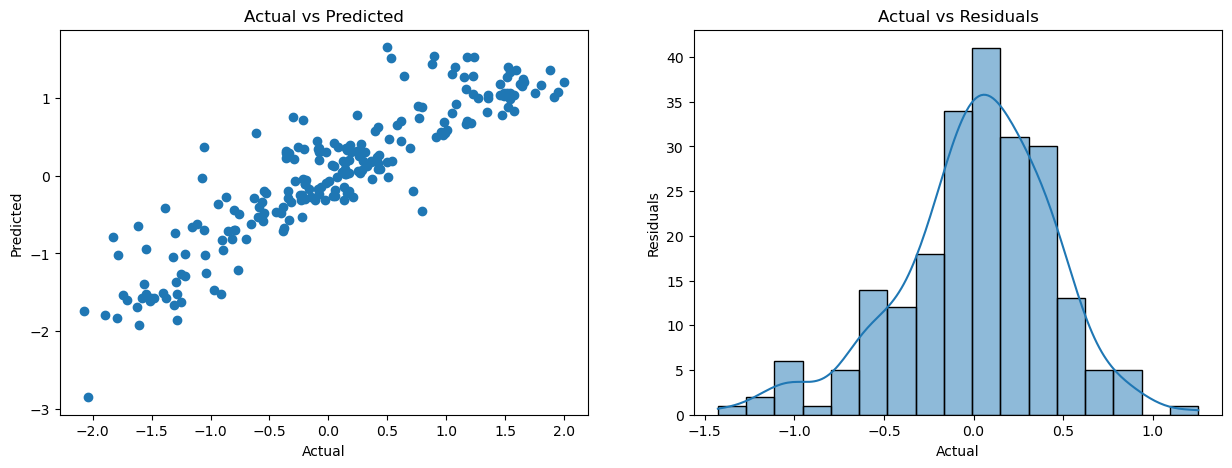

In [4002]:
# plot residuals and y_test vs y_pred for sklearn model

plt.figure(figsize=(15, 5))

#subplot 1
plt.subplot(1, 2, 1)
plt.scatter(y_test_ss, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

residuals = y_test_ss - y_pred

#subplot 2
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Actual vs Residuals')
plt.show()





##### Adjusted R2 =1- [(1 – R2) (n – 1)/ (n – k – 1)] n is the number of observations and k is the number of independent variables, R2 is the R2 score, p is the number of predictor variables


In [4003]:
# R2 Score & Adjusted R2 Score


r2= r2_score(y_test_ss, y_pred)
Adjusted_R2= 1 - (1-lm.score(X_test_scaled, y_test_ss))*(len(y_test_ss)-1)/(len(y_test_ss)-X_test_scaled.shape[1]-1)
mse = mean_squared_error(y_test_ss, y_pred)
print('R2 is {}, Adjusted R2 is {}  & MSE is {}'.format( round(r2,3), round(Adjusted_R2), round(mse,3)))


R2 is 0.81, Adjusted R2 is 1  & MSE is 0.179


##### Adjusted R2 is ~1

### Using Min Max Scaling, Stats Model

In [4004]:
X_train_min_max

,yr,holiday,workingday,season_fall,season_spring,season_summer,season_winter,weathersit_clear,weathersit_light rain,weathersit_mist,temp,hum,windspeed
653,1,0,1,0,0,0,1,1,0,0,0.509875,0.575330,0.300930
576,1,0,1,1,0,0,0,1,0,0,0.815254,0.725680,0.264678
426,1,0,0,0,1,0,0,0,0,1,0.442419,0.640148,0.255374
728,1,0,1,0,1,0,0,1,0,0,0.245214,0.498042,0.663138
482,1,0,0,0,0,1,0,0,0,1,0.395624,0.504534,0.188643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,1,0,0,0,1,0,0,0.863871,0.679720,0.187360
53,0,0,1,0,1,0,0,1,0,0,0.202674,0.435903,0.111646
350,0,0,1,0,0,0,1,0,0,1,0.248253,0.577906,0.431825
79,0,0,1,0,0,1,0,0,0,1,0.462777,0.759893,0.529997


#### Feature selection

In [4005]:
len(X_train_min_max.columns)

13

In [4006]:
#Fit the model with Min Max Scaled data for feature selection. Using SKlearn library for feature selection

lr2 = LinearRegression()
rfe =  RFE(lr2, n_features_to_select=10)
rfe = rfe.fit(X_train_min_max, y_train_mm)


In [4007]:
X_train_min_max

,yr,holiday,workingday,season_fall,season_spring,season_summer,season_winter,weathersit_clear,weathersit_light rain,weathersit_mist,temp,hum,windspeed
653,1,0,1,0,0,0,1,1,0,0,0.509875,0.575330,0.300930
576,1,0,1,1,0,0,0,1,0,0,0.815254,0.725680,0.264678
426,1,0,0,0,1,0,0,0,0,1,0.442419,0.640148,0.255374
728,1,0,1,0,1,0,0,1,0,0,0.245214,0.498042,0.663138
482,1,0,0,0,0,1,0,0,0,1,0.395624,0.504534,0.188643
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,1,0,0,0,1,0,0,0.863871,0.679720,0.187360
53,0,0,1,0,1,0,0,1,0,0,0.202674,0.435903,0.111646
350,0,0,1,0,0,0,1,0,0,1,0.248253,0.577906,0.431825
79,0,0,1,0,0,1,0,0,0,1,0.462777,0.759893,0.529997


In [4008]:
# print the features selected by RFE
print('Selected features: %s' % list(X_train_min_max.columns[rfe.support_]))

selected_features = list(X_train_min_max.columns[rfe.support_])
selected_features =['yr', 'holiday', 'season_spring', 'season_winter', 'weathersit_clear', 'weathersit_light rain', 'weathersit_mist', 'temp', 'hum', 'windspeed'] # hardcoding the features selected by RFE

X_train_min_max = X_train_min_max[selected_features]
X_test_min_max = X_test_min_max[selected_features]
X_train_min_max

Selected features: ['yr', 'holiday', 'season_spring', 'season_winter', 'weathersit_clear', 'weathersit_light rain', 'weathersit_mist', 'temp', 'hum', 'windspeed']


,yr,holiday,season_spring,season_winter,weathersit_clear,weathersit_light rain,weathersit_mist,temp,hum,windspeed
653,1,0,0,1,1,0,0,0.509875,0.575330,0.300930
576,1,0,0,0,1,0,0,0.815254,0.725680,0.264678
426,1,0,1,0,0,0,1,0.442419,0.640148,0.255374
728,1,0,1,0,1,0,0,0.245214,0.498042,0.663138
482,1,0,0,0,0,0,1,0.395624,0.504534,0.188643
...,...,...,...,...,...,...,...,...,...,...
578,1,0,0,0,1,0,0,0.863871,0.679720,0.187360
53,0,0,1,0,1,0,0,0.202674,0.435903,0.111646
350,0,0,0,1,0,0,1,0.248253,0.577906,0.431825
79,0,0,0,0,0,0,1,0.462777,0.759893,0.529997


In [4009]:
X_test_min_max

,yr,holiday,season_spring,season_winter,weathersit_clear,weathersit_light rain,weathersit_mist,temp,hum,windspeed
184,0,1,0,0,0,0,1,0.831662,0.657358,0.084376
535,1,0,0,0,1,0,0,0.901246,0.610161,0.153994
299,0,0,0,1,0,0,1,0.512002,0.837696,0.334296
221,0,0,0,0,1,0,0,0.881495,0.437139,0.339750
152,0,0,0,0,1,0,0,0.817381,0.314303,0.537376
...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,0,0,0,1,0.257672,0.708883,0.287456
702,1,0,0,1,1,0,0,0.519295,0.756183,0.283606
127,0,0,0,0,1,0,0,0.584625,0.650969,0.069618
640,1,0,0,1,0,0,1,0.745670,0.818013,0.052294


In [4010]:
#Train the model using the selected features
# add a constant to the model

X_train_min_max =sm.add_constant(X_train_min_max)
X_test_min_max = sm.add_constant(X_test_min_max)


In [4011]:
X_train_min_max

,const,yr,holiday,season_spring,season_winter,weathersit_clear,weathersit_light rain,weathersit_mist,temp,hum,windspeed
653,1.0,1,0,0,1,1,0,0,0.509875,0.575330,0.300930
576,1.0,1,0,0,0,1,0,0,0.815254,0.725680,0.264678
426,1.0,1,0,1,0,0,0,1,0.442419,0.640148,0.255374
728,1.0,1,0,1,0,1,0,0,0.245214,0.498042,0.663138
482,1.0,1,0,0,0,0,0,1,0.395624,0.504534,0.188643
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0,0,1,0,0,0.863871,0.679720,0.187360
53,1.0,0,0,1,0,1,0,0,0.202674,0.435903,0.111646
350,1.0,0,0,0,1,0,0,1,0.248253,0.577906,0.431825
79,1.0,0,0,0,0,0,0,1,0.462777,0.759893,0.529997


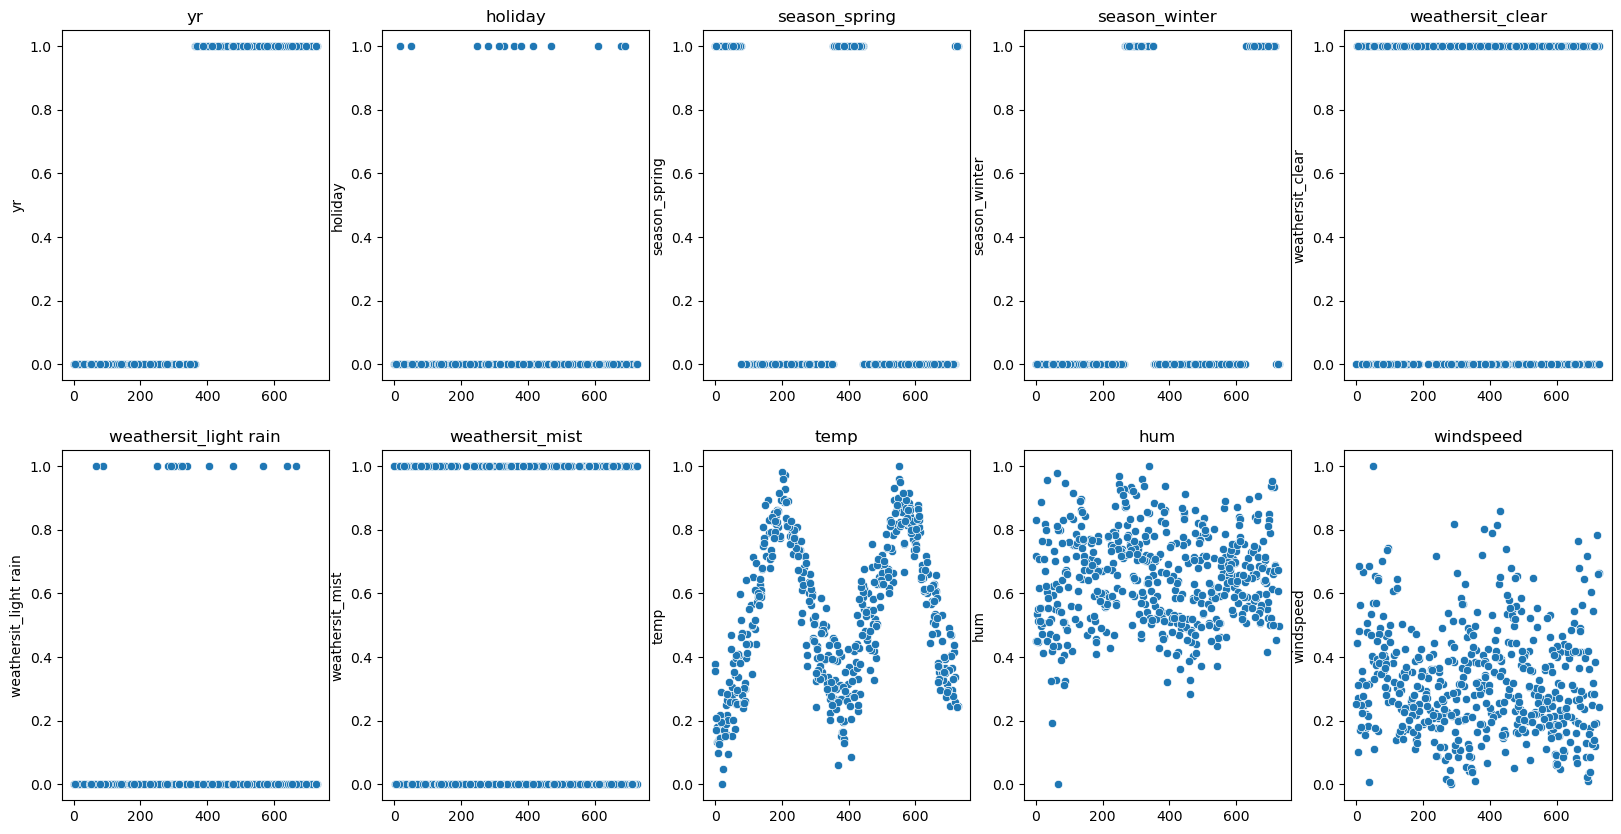

In [4012]:
# Scatter plot for the features selected by RFE excluding the constant to check the spread of values

plt.figure(figsize=(20, 10))
for i, col in enumerate(selected_features):
    plt.subplot(2, 5, i+1)
    sns.scatterplot(X_train_min_max[col])
    plt.title(col)

#### Build Model for MinMax Scaling 
##### Stats Model

In [4013]:
#Using stats model Ordinary Least Squares method to fit the model
#Model4
stats_model4 = sm.OLS(np.array(y_train_mm), X_train_min_max).fit()

In [4014]:
stats_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.8
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.14e-182
Time:                        15:36:55   Log-Likelihood:                 481.47
No. Observations:                 511   AIC:                            -942.9
Df Residuals:                     501   BIC:                            -900.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1801      0.028      6.470      0.000       0.125       0.235
yr                        0.2326      0.009     27.187      0.000       0.216       0.249
holiday                  -0.0883      0.027     -3.281      0.001      -0.141      -0.035
season_spring            -0.1176      0.016     -7.538      0.000      -0.148      -0.087
season_winter             0.0539      0.013      4.150      0.000       0.028       0.079
weathersit_clear          0.1601      0.010     16.303      0.000       0.141       0.179
weathersit_light rain    -0.0863      0.023     -3.719      0.000      -0.132      -0.041
weathersit_mist           0.1063      0.012      8.633      0.000       0.082       0.130
temp                      0.4419      0.030     14.685      0.000       0.383       0.501
hum                      -0.1295      0.039     -3.291      0.001      -0.207      -0.052
windspeed                -0.1698      0.027     -6.330      0.000      -0.222      -0.117
==============================================================================
Omnibus:                       64.278   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.740
Skew:                          -0.646   Prob(JB):                     1.25e-35
Kurtosis:                       5.425   Cond. No.                     7.12e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.77e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [4015]:
## Calculate VIF for Model4
print(calculate_vif(X_train_min_max))

                  feature    VIF
5        weathersit_clear    inf
6   weathersit_light rain    inf
7         weathersit_mist    inf
8                    temp  2.590
3           season_spring  2.519
9                     hum  1.848
4           season_winter  1.771
10              windspeed  1.163
1                      yr  1.030
2                 holiday  1.012
0                   const  0.000


In [4016]:
#weather mist, weather clear and light rain showing high VIF, drop weather mist

X_train_min_max = X_train_min_max.drop('weathersit_mist', axis=1)
X_test_min_max = X_test_min_max.drop('weathersit_mist', axis=1)

In [4017]:
#Model5

stats_model5 = sm.OLS(np.array(y_train_mm), X_train_min_max).fit()
print(stats_model5.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     259.8
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          2.14e-182
Time:                        15:36:56   Log-Likelihood:                 481.47
No. Observations:                 511   AIC:                            -942.9
Df Residuals:                     501   BIC:                            -900.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [4018]:
#Calculate VIF for Model5
print(calculate_vif(X_train_min_max))

                 feature     VIF
0                  const  76.176
7                   temp   2.590
3          season_spring   2.519
8                    hum   1.848
4          season_winter   1.771
5       weathersit_clear   1.612
9              windspeed   1.163
6  weathersit_light rain   1.112
1                     yr   1.030
2                holiday   1.012


#### With Mix Max Scaling and using stats model for LR, Model5 Explains 82% of Variance, all Beta CoEFF are signifant and VIF for all predictor variables are less than 3

##### Predict on Test Data

In [4019]:
X_test_min_max

,const,yr,holiday,season_spring,season_winter,weathersit_clear,weathersit_light rain,temp,hum,windspeed
184,1.0,0,1,0,0,0,0,0.831662,0.657358,0.084376
535,1.0,1,0,0,0,1,0,0.901246,0.610161,0.153994
299,1.0,0,0,0,1,0,0,0.512002,0.837696,0.334296
221,1.0,0,0,0,0,1,0,0.881495,0.437139,0.339750
152,1.0,0,0,0,0,1,0,0.817381,0.314303,0.537376
...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,1,0,0,0,0.257672,0.708883,0.287456
702,1.0,1,0,0,1,1,0,0.519295,0.756183,0.283606
127,1.0,0,0,0,0,1,0,0.584625,0.650969,0.069618
640,1.0,1,0,0,1,0,0,0.745670,0.818013,0.052294


In [4020]:
#Predict on test data
#remove the Working day column from X_test_min_max
y_pred = stats_model5.predict(X_test_min_max)

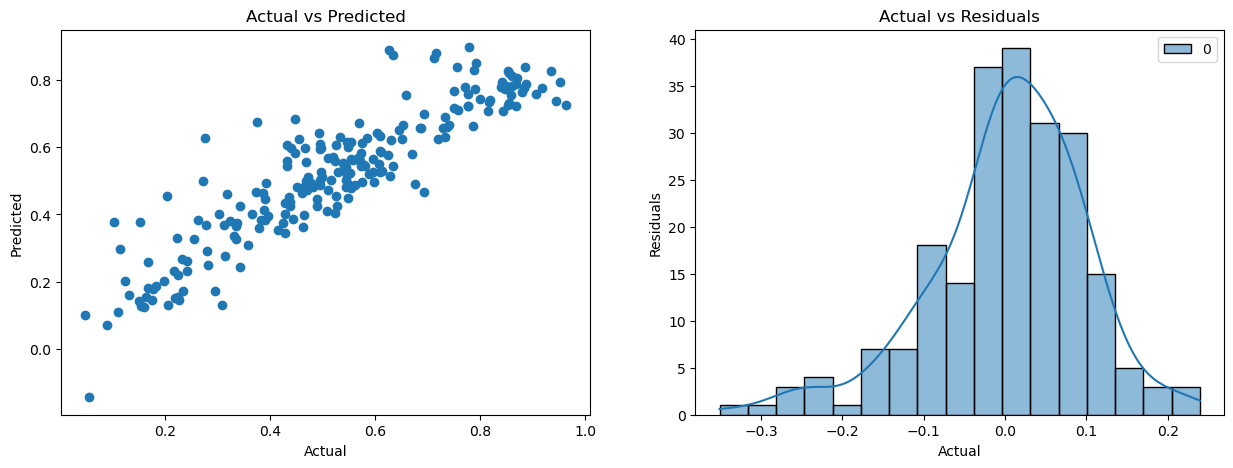

R2 is 0.808 & MSE is 0.009
Assumptions of Linear Model Holds good. Homoscedasticity, Normality of Residuals, Linearity of the model


In [4021]:
## Plot y_test vs y_pred and residuals

#Add best fit line to the scatter plot



plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_mm, y_pred)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.subplot(1, 2, 2)
residuals = (y_test_mm - np.array(y_pred).reshape(-1,1))
sns.histplot(residuals, kde=True)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Actual vs Residuals')
plt.show()

print('R2 is {} & MSE is {}'.format(round(r2_score(y_test_mm, y_pred),3), round(mean_squared_error(y_test_mm, y_pred),3)))
print('Assumptions of Linear Model Holds good. Homoscedasticity, Normality of Residuals, Linearity of the model')

In [4022]:
len(X_train_min_max.columns)

10

### With MinMaX scaling, Building LR model using stats model, MODEL5 explains 80% of varience &  MSE of ~ 0.01

## Manual Feature Selection 

##### Select All columns and evluate

In [4023]:
#X_test_min_max_scaled_manual, y_test_mm, X_train_min_max_scaled_manual, y_train_mm can be used

In [4024]:
len(X_train_min_max_scaled_manual.columns)

13

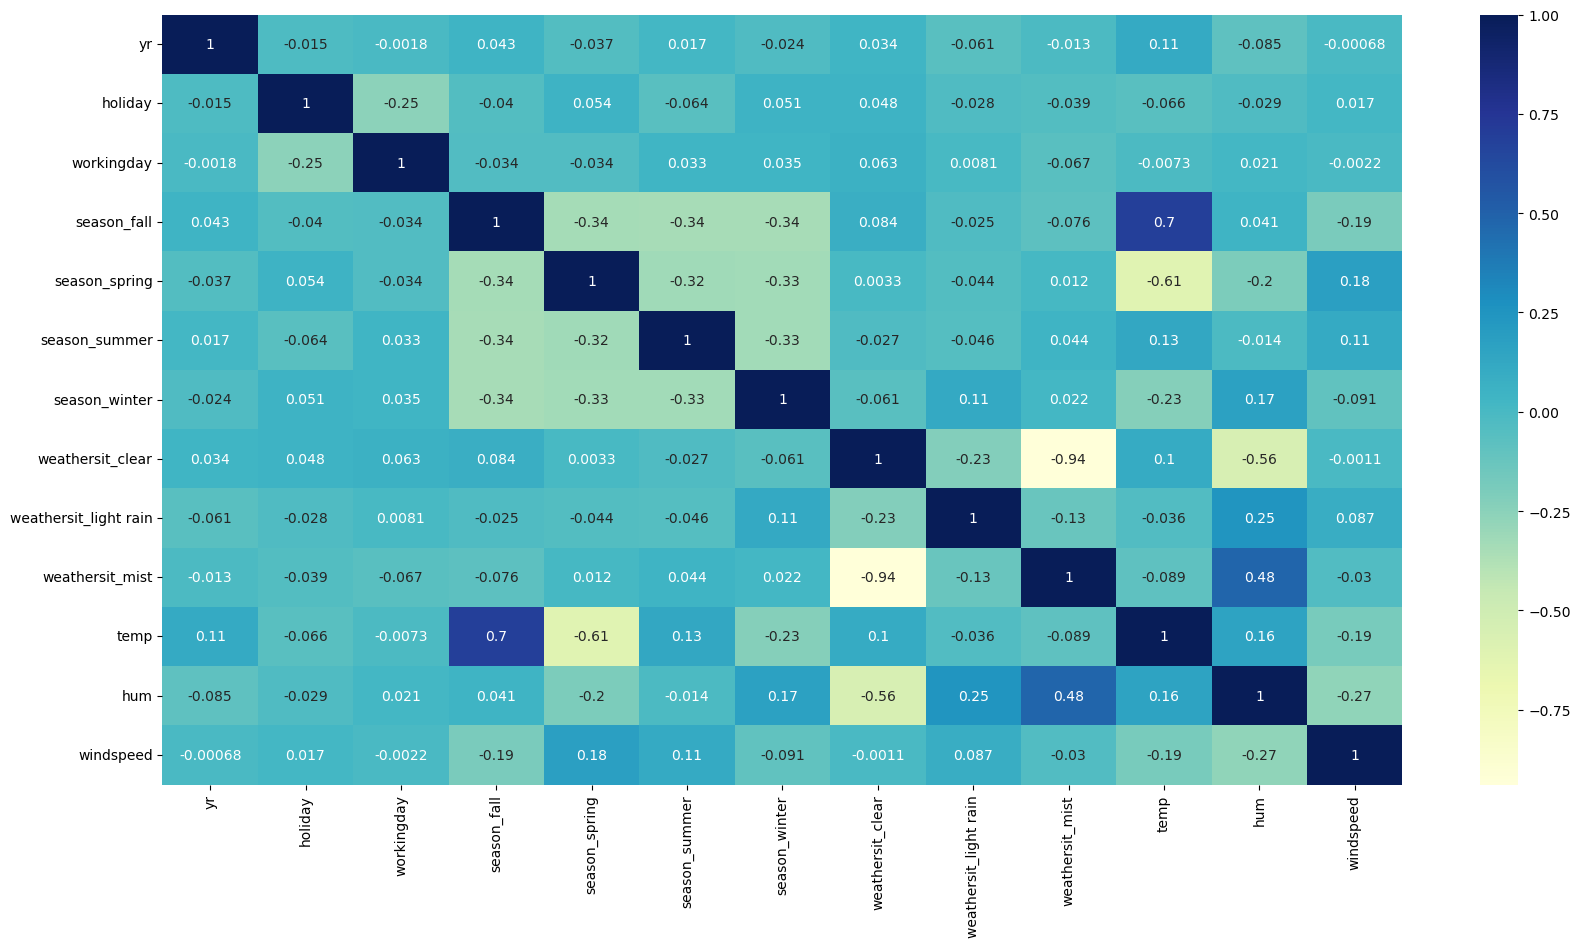

In [4025]:
# lets check the correlation between the variables

plt.figure(figsize=(20, 10))
sns.heatmap(X_train_min_max_scaled_manual.corr(), annot=True, cmap="YlGnBu")
plt.show()

- Weather mist and weather clear are highly inversely correlated and one of them can be removed


In [4026]:
X_train_min_max_scaled_manual = X_train_min_max_scaled_manual.drop('weathersit_mist', axis=1)

In [4027]:
X_test_min_max_scaled_manual.drop('weathersit_mist', axis=1, inplace=True)

In [4028]:
X_test_min_max_scaled_manual.columns

Index(['yr', 'holiday', 'workingday', 'season_fall', 'season_spring',
       'season_summer', 'season_winter', 'weathersit_clear',
       'weathersit_light rain', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [4029]:
X_train_min_max_scaled_manual.shape, X_test_min_max_scaled_manual.shape

((511, 12), (219, 12))

In [4030]:
# Build stats model using Ordinary Least Squares method for the features selected by RFE.

X_train_min_max_scaled_manual = sm.add_constant(X_train_min_max_scaled_manual)
X_test_min_max_scaled_manual = sm.add_constant(X_test_min_max_scaled_manual)

stats_model6 = sm.OLS(y_train_mm, X_train_min_max_scaled_manual).fit()
print(stats_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.8
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.25e-183
Time:                        15:36:56   Log-Likelihood:                 488.45
No. Observations:                 511   AIC:                            -952.9
Df Residuals:                     499   BIC:                            -902.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [4031]:
# All the variables are significant. Check VIF

print(calculate_vif(X_train_min_max_scaled_manual))

                  feature    VIF
4             season_fall    inf
5           season_spring    inf
6           season_summer    inf
7           season_winter    inf
10                   temp  3.505
11                    hum  1.876
8        weathersit_clear  1.635
12              windspeed  1.194
9   weathersit_light rain  1.116
3              workingday  1.087
2                 holiday  1.086
1                      yr  1.033
0                   const  0.000


In [4032]:
# Season fall, spring and summer, winter are showing high VIF, drop season fall

X_train_min_max_scaled_manual = X_train_min_max_scaled_manual.drop('season_fall', axis=1)
X_test_min_max_scaled_manual = X_test_min_max_scaled_manual.drop('season_fall', axis=1)


In [4033]:
#Model7
stats_model7 = sm.OLS(y_train_mm, X_train_min_max_scaled_manual).fit()
print(stats_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     218.8
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          6.25e-183
Time:                        15:36:57   Log-Likelihood:                 488.45
No. Observations:                 511   AIC:                            -952.9
Df Residuals:                     499   BIC:                            -902.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.25

In [4034]:
# Check VIF

print(calculate_vif(X_train_min_max_scaled_manual))

                  feature     VIF
0                   const  89.898
4           season_spring   4.547
9                    temp   3.505
6           season_winter   3.105
5           season_summer   2.067
10                    hum   1.876
7        weathersit_clear   1.635
11              windspeed   1.194
8   weathersit_light rain   1.116
3              workingday   1.087
2                 holiday   1.086
1                      yr   1.033


In [4035]:
len(X_train_min_max_scaled_manual.columns)

12

### This model, MODEL7, explains 82% of variance, all selected variables are significant, lets test the model with test data. VIF is less than 5 for chosen predictor features

In [4036]:
# Drop the columns from test data that were dropped from train data

X_test_min_max_scaled_manual = X_test_min_max_scaled_manual[X_train_min_max_scaled_manual.columns]

In [4037]:
y_pred = stats_model7.predict(X_test_min_max_scaled_manual)

In [4038]:
#R2 and MSE

r2 = r2_score(y_test_mm, y_pred)
mse = mean_squared_error(y_test_mm, y_pred)
print('R2 is {} & MSE is {}'.format(round(r2,3), round(mse,3)))

R2 is 0.809 & MSE is 0.009


In [4039]:
y_test_mm.shape, y_pred.shape

((219, 1), (219,))

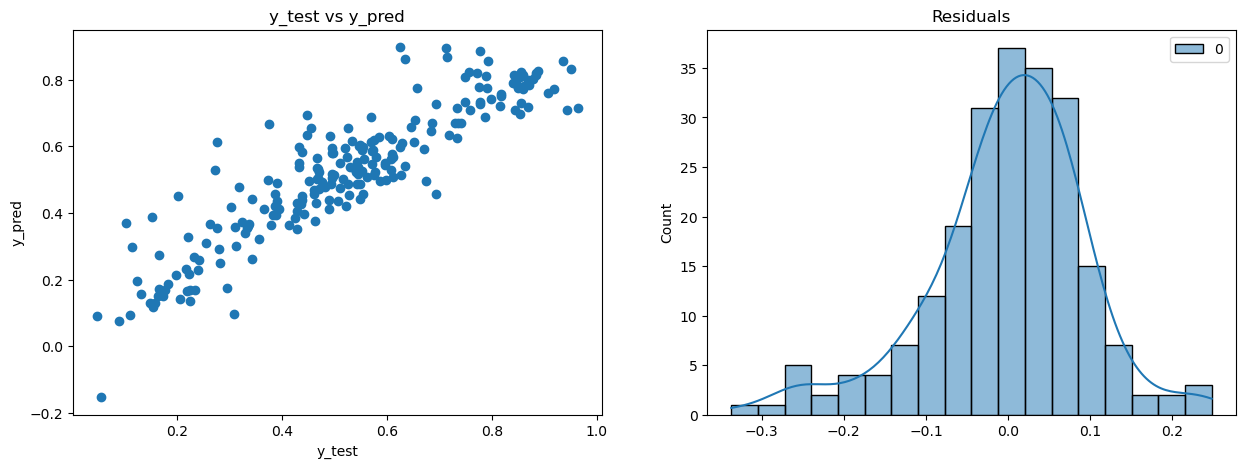

In [4040]:
# plot y_test vs y_pred & residuals as histogram

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test_mm, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.title('y_test vs y_pred')

plt.subplot(1, 2, 2)
sns.histplot(y_test_mm - np.array(y_pred).reshape(-1,1), kde=True)
plt.title('Residuals')
plt.show()

- R2 is around 81% and MSE is 0.009
- Linear regression assumptions are met. Homoscedasticity, Normality of Residuals, Linearity of the model

#### Inference

### Exploratory Data Analysis - Learning Data

- Model building exercise was carried out by performing exploratory data analyis to understand the data and the pattern. Any issue with data was addressed accordingly. relationship among the predictor variables and its correlation with target variable was understood with help of pairplots and heatmap. Some of the variables like weekday/working day & temp/atemp,  were identified at redundant as they had an correlation with each other. Also the casual and registered are directly the porttion of "cnt" target variable and hence it was dropped.
<br>

### Preprocessing of Data
- Once the predictor variables were identified, the data set was categorized into Numerical and Categorical columns. For Categorical fields, dummy variables were created. Some of the Categorical variables had numerical value 1,2,3.. to represent different category, but those numbers didnt carry any numerical significance. Actual Category values (ex Season..) were brought in and later dummy variables were used to convert to binary values. Didnt use month value here as Season would represent the month. 
<br>

### Scaling of the data

- Scaling was done to bring all the numerical variables to same scale. <b>Categorical Variables werent scaled as they were already having binary values</b>. Both of type of scaling were done, Standardization and MinMax scaling were used. Different models were built to understand the impact of scaling. For Manual selection of predictor variables, MinMax scaling was used. One the explict point to note "y" -"Target Variable" also needs to be scaled. Scaling was performed after splitting the data in to <b> TEST and TRAINING sets </b>. Scaling could have performed before splitting into test and training set, which is an ideal practice, to understand impact of not scaling this method was performed. 

##### key learnings
- Scale only Numerical Variables
- Scale Target Value also. It is better to scale whole dataframe excluding categorical variable & then perform train-test split.
- Both MinMax and Standardization gave similar model variance explainability and co-efficients.
- Fit & Transform Training Values & <b>Only Fit Test Values </b>. 

### Feature Selection <br>
- Both Automated RFE, and Manual Predictor selection were performed. For manual selection, MinMax Scaling was considered. Multiple models were built, analysed p value, VIF to select best predictor variables to build model. for RFE, coulum count was considered as 10. For manual model, variables with high correlation was dropped and then model was built, <b>p values </b> were determined, dropped the variables which had p-values more than 0.05 and then VIF was caluclated to check if any predictor field variance is determined by other predictor fields.

### Building Model <br>
- For model building, these combination of Scaling, Feature Selection and Models were considered.
  - Standard Scaling - RFE - Stats Model. Multiple models were built to find best coffecients and R2 with low VIF
  - Standard Scaling -RFE - Linear Regression Model. Both models coffeicients were compared.
  - MinMax Scaling - RFE - Stats Model
  - MinMax Scaling - Manual Selection - Stats Model

- For all these models, <b> R2, Adjusted R2, & MSE </b> were calucated. For the final Models in each combination, prediction were done aganinst test data. Outputs were plotted to verify the assumptions of linear regression.
- Assumptions of Linear Regression
  - Linear Relationship between Target and Predictor Variable
  - Homoscedasticity
  - Residuals are normally distributed with mean around 0
  - No Relation between Residuals

### Model comparison
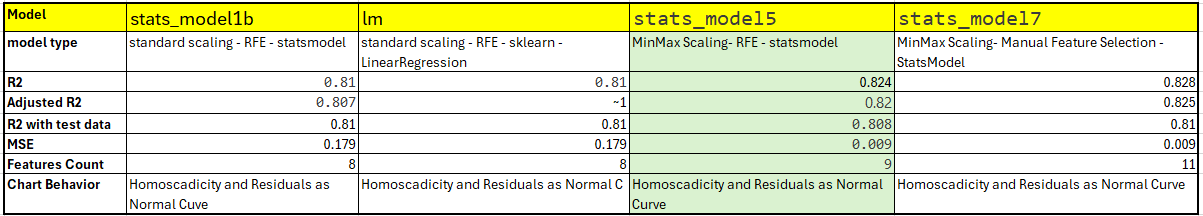


#### <b>stats_model5</b> is the better model among 4 models as it explains 82% of variance with test data (stable when compared to training data), all coefficients are significant and very less or no collinearity between features. MSE is lesser than model built using standard scaler hence this was chosen

   

